# Подход 1: градиентный бустинг "в лоб"

In [1]:
import numpy as np
import pandas as pd
import re
import time
import datetime
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
%matplotlib inline

/home/magzhan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Очистка данных

In [2]:
train = pandas.read_csv('features.csv', index_col='match_id')
test = pandas.read_csv('features_test.csv', index_col='match_id')

In [2]:
train.drop(['duration', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire'], axis=1, inplace=True)


In [2]:
y_train = train['radiant_win']

In [2]:
del train['radiant_win']

In [2]:
X_train = train.fillna(0)
X_test = test.fillna(0)

## Подбор количества деревьев для модели

In [ ]:
cv = KFold(y_train.size, n_folds=5, shuffle=True, random_state=42)
scores = []
nums = [10, 15, 30, 45, 90, 210]

In [6]:
for n in nums:
    print('Trees: ', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print('Time spent:', datetime.datetime.now() - start_time)
    print(model_scores)
    scores.append(np.mean(model_scores))

Trees:  10
Time spent: 0:00:33.216269
[ 0.66383799  0.66635457  0.66360048  0.66529818  0.66516222]
Trees:  15
Time spent: 0:00:37.299180
[ 0.67589098  0.67647457  0.67383635  0.67687101  0.67817953]
Trees:  30
Time spent: 0:01:12.953325
[ 0.68892093  0.68934663  0.68712298  0.69180598  0.69283583]
Trees:  45
Time spent: 0:01:44.454350
[ 0.6948171   0.69558113  0.69321138  0.69771267  0.69809312]
Trees:  90
Time spent: 0:03:38.971090
[ 0.70428355  0.70489618  0.70314489  0.70636257  0.70710108]
Trees:  210
Time spent: 0:10:03.826197
[ 0.71280325  0.71332323  0.71319499  0.71585593  0.71541683]


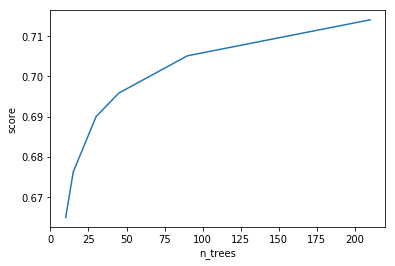

In [7]:
plot.plot(nums, scores)
plot.xlabel('n_trees')
plot.ylabel('score')
plot.show()

## Выводы:
#### **Какие признаки имеют пропуски среди своих значений (приведите полный список имен этих признаков)? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?**

**Пропуски**:
* **first_blood_player1**/**first_blood_player2** (игроки причастные к событию first_blood) - в 20% случаев первой крови нет в первые 5 минут игры
* **first_blood_time** (игровое время первой крови) - в 20% случаев первой крови нет в первые 5 минут игры
* **first_blood_team** (команда, совершившая первую кровь) - аналогично first_blood_time, процент совпадает (20%)
* **dire_bottle_time**/**radiant_bottle_time** (время первого приобретения командой предмета "bottle") - в 16% случаев команда не приобретает предмет "bottle" в первые 5 минут игры
* **dire_first_ward_time**/**radiant_first_ward_time** (время установки командой первого "наблюдателя") - очень редкое явление, в 1% случаев команда не ставит "наблюдателя" в первые 5 минут игры
* **dire_courier_time**/**radiant_courier_time** (время приобретения предмета "courier") - самое редкое явление, в 0.5% случаев команда не приобретает предмет "courier" в первые 5 минут игры
* **dire_flying_courier_time**/**radiant_flying_courier_time** (время приобретения предмета "flying_courier") - в 28% случаев команда не покупает "flying_courier" в первые 5 минут игры

#### **Как называется столбец, содержащий целевую переменную?**

* **radiant_win** - победа команды radiant и проигрыш комады dire

#### Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти выше по тексту. Какое качество при этом получилось?

* Кросс-валидация для градиентного бустинга с 30 деревьями заняла  0:01:12.953325. Показатель  AUC-ROC равен 0.69.

### Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что можно сделать, чтобы ускорить его обучение при увеличении количества деревьев?

* Увеличение количества деревьев также увеличивает показатель метрики AUC-ROC. Для достижения большего качества имеет смысл использовать более 30 деревьев. Для ускорения обучения можно уменьшить глубину деревьев (параметр max_depth).

